<a href="https://colab.research.google.com/github/Andrewseltzer/StatisticsHomework/blob/main/AndrewSeltzer_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stats Notebook Lab #4


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([12, 17, 18, 23, 56, 37, 48])

In [3]:
# population

In [4]:
def mean(x):
    return np.sum(x)/x.shape[0]

In [5]:
def var(x):
    return mean((x - mean(x))**2)

In [6]:
def std(x):
    return np.sqrt(var(x))

In [7]:
mean(x)

30.142857142857142

In [8]:
var(x)

247.83673469387756

In [9]:
std(x)

15.742831215949613

### Random Number Generator

In [10]:
m = 75                 # multiplier
b = 74                 # increment
n = 65537              # modulus 

In [11]:
x = 123456      # seed value

In [12]:
X = np.zeros(50000,)

In [13]:
x = (m * x + b) % n

In [14]:
for i in range(X.shape[0]):

    x = (m * x + b) % n
    
    X[i] = x

X /= np.max(X)

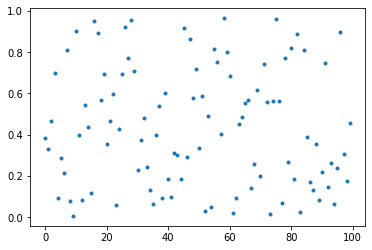

In [29]:
plt.plot(X[:100],'.')

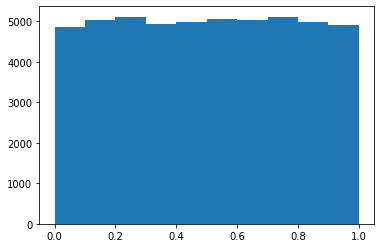

In [30]:
plt.hist(X);

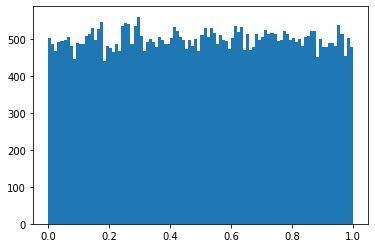

In [31]:
plt.hist(X,100);

In [32]:
X

array([0.38383934, 0.3290291 , 0.46590152, ..., 0.58683083, 0.03509369,
       0.44164423])

In [33]:
X

array([0.38383934, 0.3290291 , 0.46590152, ..., 0.58683083, 0.03509369,
       0.44164423])

In [34]:
X

array([0.38383934, 0.3290291 , 0.46590152, ..., 0.58683083, 0.03509369,
       0.44164423])

### Random Numbers

In [35]:
X = np.random.random(50000,)

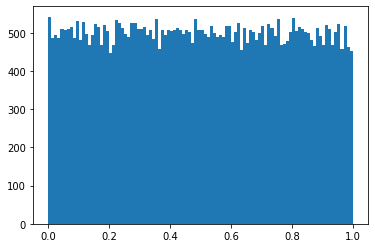

In [36]:
plt.hist(X,100);

In [37]:
np.random.random()

0.22505661264999377

In [38]:
r = np.random.random()

In [39]:
r

0.7788540810040723

In [40]:
r = np.random.randint(1,10)

In [41]:
r

6

In [42]:
r = np.random.randint(1,10,size=(10,2))

In [43]:
r

array([[4, 4],
       [5, 4],
       [4, 5],
       [4, 5],
       [4, 4],
       [5, 5],
       [3, 9],
       [4, 7],
       [8, 2],
       [3, 8]])

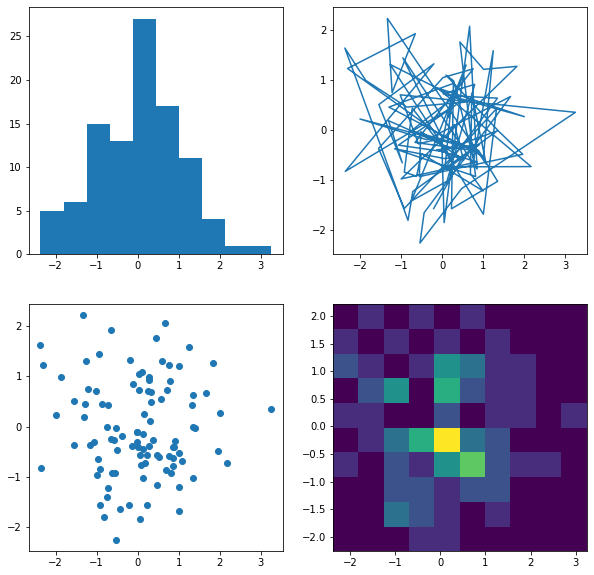

In [ ]:
np.random.seed(12345)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

Normal Dist Data

In [44]:
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

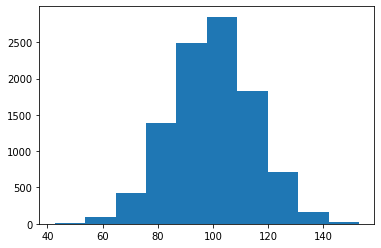

In [45]:
n,bins,patches = plt.hist(x)

In [46]:
bins

array([ 42.64384686,  53.67961676,  64.71538667,  75.75115657,
        86.78692648,  97.82269638, 108.85846629, 119.89423619,
       130.93000609, 141.965776  , 153.0015459 ])

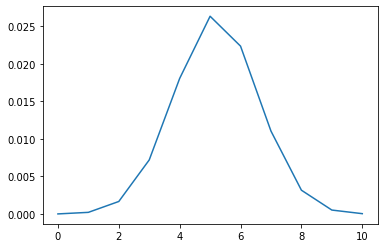

In [47]:
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(y)

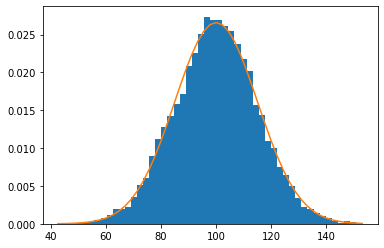

In [48]:
num_bins = 50
n,bins,patches = plt.hist(x, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

In [49]:
def mean(x):
    return np.sum(x)/x.shape[0]

In [50]:
def var(x):
    return mean((x - mean(x))**2)

In [51]:
def std(x):
    return np.sqrt(var(x))

In [52]:
mean(x)

99.88872290409434

In [53]:
std(x)

14.988094804397337

# Normal Random Number Generator

In [54]:
#CDF PDF

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [55]:
def normal_pdf(x,mu,sigma):
  
  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [56]:
x = np.linspace(-6,6,1000)

In [57]:
mu = 0

In [58]:
sigma = 1

In [59]:
pdf = normal_pdf(x,mu,sigma) #Use Normal for demo, replace with custom function pdf

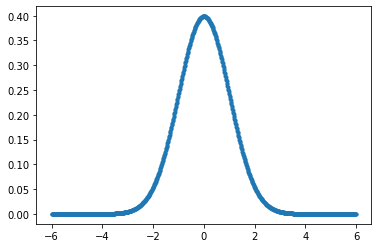

In [60]:
plt.plot(x,pdf,'.')

In [61]:
def partial_sums(x):

  y = np.zeros(x.shape)
  
  for n in range(x.shape[0]):
    
    y[n] = np.sum(x[0:n])
    
  y = y / np.max(y)
    
  return y

In [62]:
cdf = partial_sums(pdf)

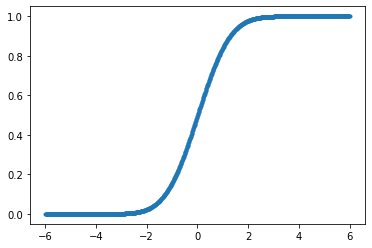

In [63]:
plt.plot(x,cdf,'.');

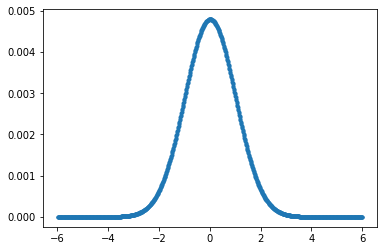

In [64]:
d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the diff of the cdf gives you back the pdf
plt.plot(x[1:],d_cdf,'.');  #Not required for sampling 

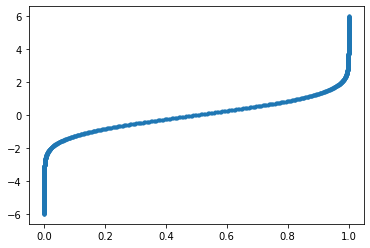

In [65]:
plt.plot(cdf,x,'.');

In [66]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))
  
  return idx

In [67]:
find_nearest(cdf, 0.1)

393

In [68]:
x[393]

-1.2792792792792795

In [69]:
xr = np.random.random((10000,))

In [70]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):
  
  w[i] = x[find_nearest(cdf, xr[i])]

In [71]:
w.shape

(10000,)

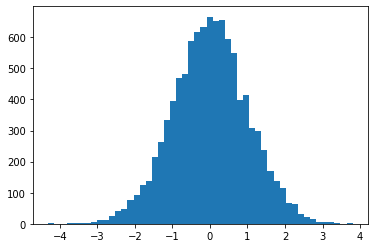

In [72]:
plt.hist(w,50);

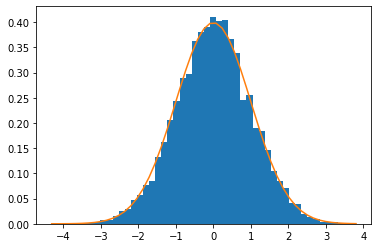

In [73]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

# Random Color

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
z = np.random.randint(0,255,size=(10,10,3))

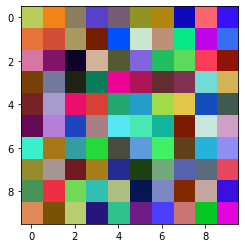

In [76]:
plt.imshow(z)

In [77]:
z = np.zeros((10,10,3))

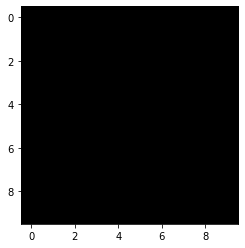

In [78]:
plt.imshow(z)

In [79]:
z = 0*np.ones((10,10,3))

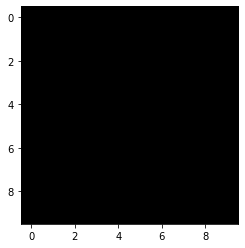

In [80]:
plt.imshow(z)

In [81]:
z = 255*np.ones((10,10,3))

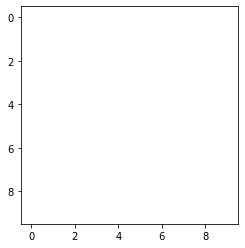

In [82]:
plt.imshow(z)

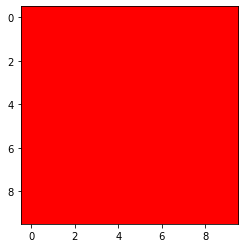

In [83]:
z = np.ones((10,10,3))

z[:,:,0] = 1
z[:,:,1] = 0
z[:,:,2] = 0

plt.imshow(z)

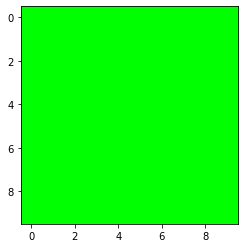

In [84]:
z = np.ones((10,10,3))

z[:,:,0] = 0
z[:,:,1] = 1
z[:,:,2] = 0

plt.imshow(z)

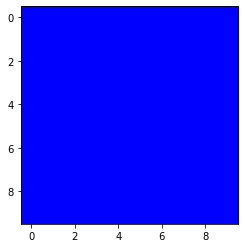

In [85]:
z = np.ones((10,10,3))

z[:,:,0] = 0
z[:,:,1] = 0
z[:,:,2] = 1

plt.imshow(z)

0.23964822558358811 0.09909466386621546 0.35608347850889266


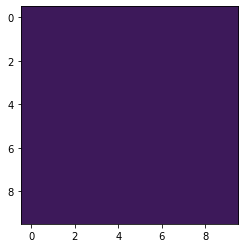

In [86]:
z = np.ones((10,10,3))

r = np.random.rand()
g = np.random.rand()
b = np.random.rand()

print(r,g,b)

z[:,:,0] = r
z[:,:,1] = g
z[:,:,2] = b

plt.imshow(z);

0.6643096925464019 0.10144225245083971 0.3333844718060488


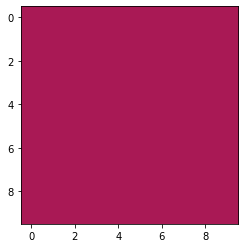

0.7089890525060415 0.782849122250874 0.5525294668090187


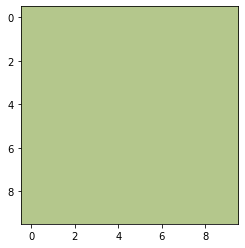

0.24491176481085086 0.43995595391040443 0.18053245720795374


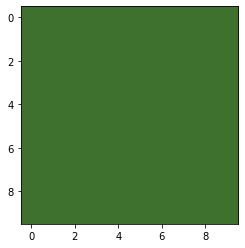

0.1366704792311496 0.7909753901830556 0.059319607049057255


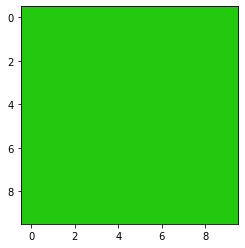

0.30869279619007317 0.7283779450568817 0.9525807821042764


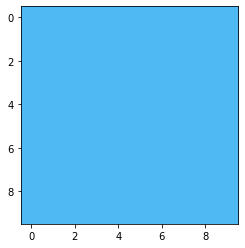

0.5865640722718165 0.6661826367878274 0.5472506401634875


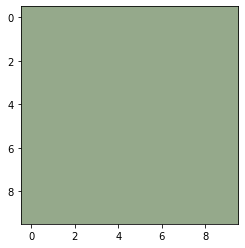

0.2986681258259456 0.3550616651687257 0.014737639288738946


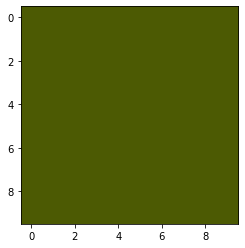

0.7017404636003823 0.45487193656357583 0.32066403033536184


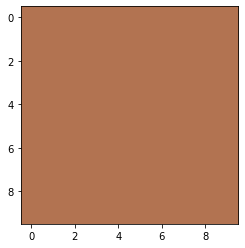

0.03676589875705538 0.7368262062520079 0.6863542020443837


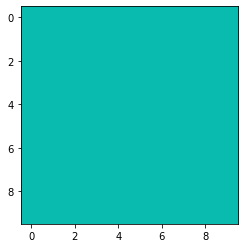

0.05213909826987684 0.12366297977872065 0.2174382024325796


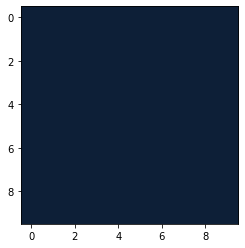

In [87]:
for i in range(10):

    z = np.ones((10,10,3))

    r = np.random.rand()
    g = np.random.rand()
    b = np.random.rand()

    print(r,g,b)

    z[:,:,0] = r
    z[:,:,1] = g
    z[:,:,2] = b

    plt.imshow(z);
    plt.show()

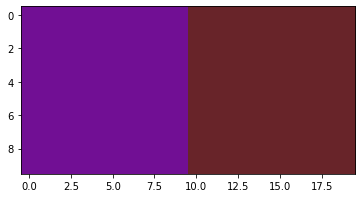

In [88]:
z1 = np.ones((10,10,3))
z1[:,:,0] = np.random.rand()
z1[:,:,1] = np.random.rand()
z1[:,:,2] = np.random.rand()

z2 = np.ones((10,10,3))
z2[:,:,0] = np.random.rand()
z2[:,:,1] = np.random.rand()
z2[:,:,2] = np.random.rand()

z3 = np.hstack((z1,z2))

plt.imshow(z3);
plt.show()

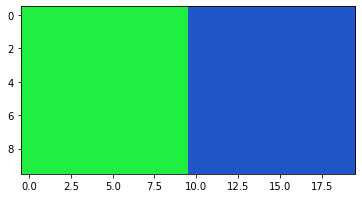

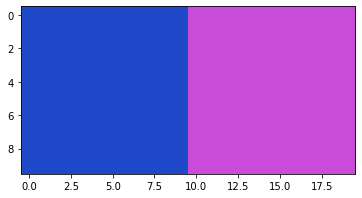

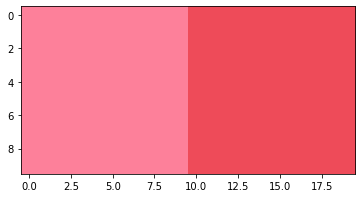

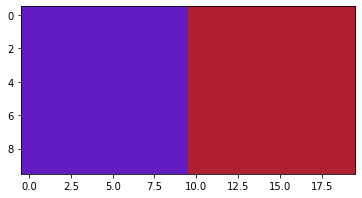

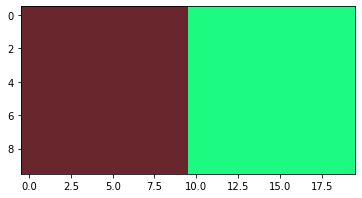

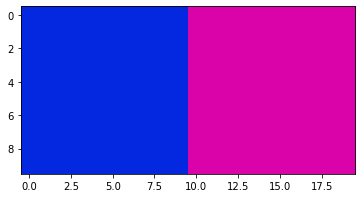

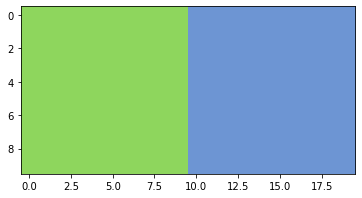

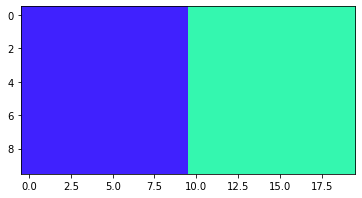

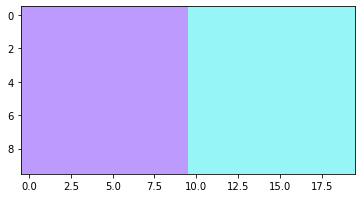

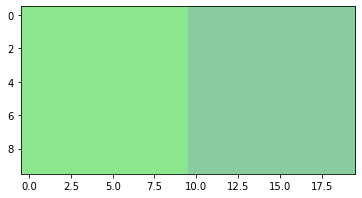

In [89]:
for i in range(10):
    
    z1 = np.ones((10,10,3))
    z1[:,:,0] = np.random.rand()
    z1[:,:,1] = np.random.rand()
    z1[:,:,2] = np.random.rand()

    z2 = np.ones((10,10,3))
    z2[:,:,0] = np.random.rand()
    z2[:,:,1] = np.random.rand()
    z2[:,:,2] = np.random.rand()

    z3 = np.hstack((z1,z2))

    plt.imshow(z3);
    plt.show()

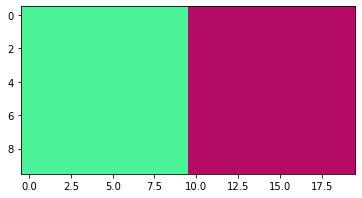

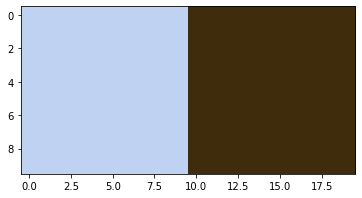

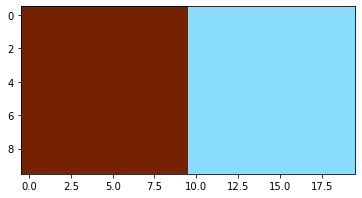

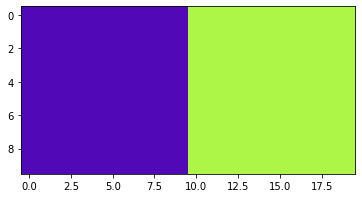

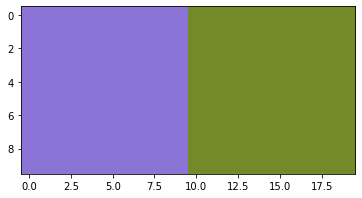

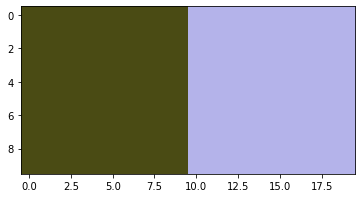

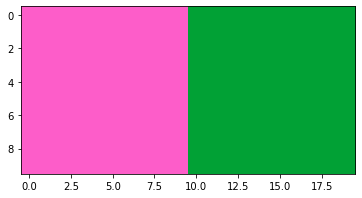

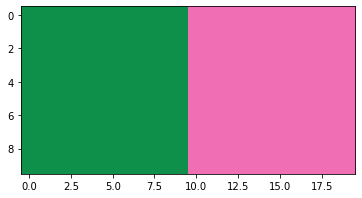

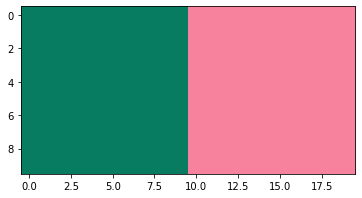

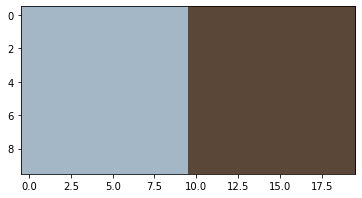

In [90]:
for i in range(10):
    
    z1 = np.ones((10,10,3))
    z2 = np.ones((10,10,3))

    r = np.random.rand()
    g = np.random.rand()
    b = np.random.rand()

    z1[:,:,0] = r
    z1[:,:,1] = g
    z1[:,:,2] = b
    
    z2[:,:,0] = 1-r
    z2[:,:,1] = 1-g
    z2[:,:,2] = 1-b

    z3 = np.hstack((z1,z2))

    plt.imshow(z3);
    plt.show()

https://lospec.com/palette-list

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
import imageio
from PIL import Image

def get_colors_lospec(url):
    im = imageio.imread(url)
    rgb_list = (im/255)[0,:,0:3]
    float_list = list(np.linspace(0,1,len(rgb_list)))    
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [92]:
url = 'https://lospec.com/palette-list/agb-32x.png'

In [93]:
url = 'https://lospec.com/palette-list/agb-1x.png'

In [94]:
url = 'https://lospec.com/palette-list/moondrom-1x.png'

In [95]:
im = imageio.imread(url)

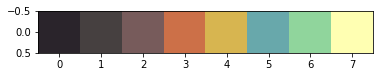

In [96]:
plt.imshow(im);

In [97]:
z = np.random.randint(0,255,size=(10,10))

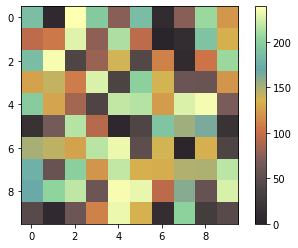

In [98]:
plt.imshow(z, cmap=get_colors_lospec(url))
plt.colorbar();

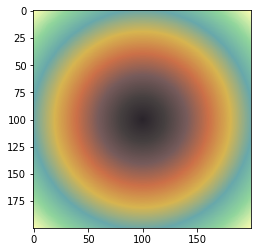

In [99]:
x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = np.sqrt(x**2 + y**2)

plt.imshow(z, cmap=get_colors_lospec(url));
plt.show()

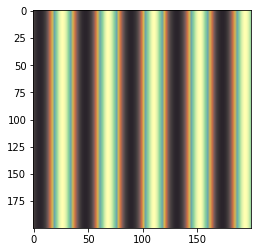

In [100]:
x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = np.sin(3*y)

plt.imshow(z, cmap=get_colors_lospec(url));
plt.show()

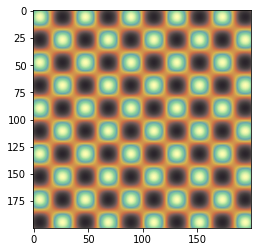

In [101]:
x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = np.sin(3*y)*np.sin(3*x)

plt.imshow(z, cmap=get_colors_lospec(url));
plt.show()